<a href="https://colab.research.google.com/github/karahanmerves/parametrically_optimised_mechanical_metamaterials/blob/main/mechanical_metamaterials_parametrically_optimised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#% matplotlib inline

In [ ]:
data = pd.read_csv('/content/8cellOptDataTension_csv.csv')
data.head(10)

,A,B,C,D,E,F,G,SpecificSE,Step_1__History_Max__ALLSE,Step_1__History_Max__MASS,Design Feasibility,Objective and Penalty
1,0.719782,2.393628,0.449239,2.541805,0.138466,0.149487,0.170810,339282162.6,4.50336,1.327320e-08,9,-339282162.6
2,0.542128,1.761114,0.312525,2.218745,0.215059,0.276831,0.158605,392649841.1,9.65043,2.457770e-08,9,-392649841.1
3,1.243611,1.772772,0.076062,2.462492,0.191527,0.129356,0.132083,383693013.8,7.54022,1.965170e-08,7,-383693013.8
4,1.051442,2.533372,0.101741,3.740996,0.236369,0.279108,0.236785,353354979.2,9.54433,2.701060e-08,7,-353354979.2
5,0.425547,2.285715,0.132488,3.513935,0.170608,0.110426,0.151515,337543381.7,5.20340,1.541550e-08,7,-337543381.7
6,0.217533,2.711056,0.360053,3.943350,0.131723,0.122382,0.218155,290085068.9,4.15338,1.431780e-08,7,-290085068.9
7,0.682447,1.558370,0.258083,3.115793,0.172398,0.287920,0.283003,365445564.1,10.52750,2.880730e-08,7,-365445564.1
8,1.252052,2.664667,0.202653,4.009739,0.225780,0.245139,0.296492,352260516.3,8.87073,2.518230e-08,7,-352260516.3
9,1.110395,2.303800,0.222548,2.701308,0.164198,0.255461,0.109463,352988722.6,6.58564,1.865680e-08,7,-352988722.6
10,1.492024,2.750050,0.491037,3.445148,0.261820,0.261794,0.181192,350129054.6,9.21074,2.630670e-08,7,-350129054.6


In [ ]:
# Aykırı değerleri tespit edin (örneğin, IQR yöntemini kullanarak)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri çıkarın
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
data.head(10)

,A,B,C,D,E,F,G,SpecificSE,Step_1__History_Max__ALLSE,Step_1__History_Max__MASS,Design Feasibility,Objective and Penalty
3,1.243611,1.772772,0.076062,2.462492,0.191527,0.129356,0.132083,383693013.8,7.54022,1.965170e-08,7,-383693013.8
5,0.425547,2.285715,0.132488,3.513935,0.170608,0.110426,0.151515,337543381.7,5.20340,1.541550e-08,7,-337543381.7
7,0.682447,1.558370,0.258083,3.115793,0.172398,0.287920,0.283003,365445564.1,10.52750,2.880730e-08,7,-365445564.1
9,1.110395,2.303800,0.222548,2.701308,0.164198,0.255461,0.109463,352988722.6,6.58564,1.865680e-08,7,-352988722.6
10,1.492024,2.750050,0.491037,3.445148,0.261820,0.261794,0.181192,350129054.6,9.21074,2.630670e-08,7,-350129054.6
12,0.778689,2.232877,0.090638,2.131458,0.253574,0.223266,0.212822,363558877.5,8.38574,2.306570e-08,7,-363558877.5
13,0.274022,2.820844,0.063393,2.935481,0.283108,0.106825,0.100831,336906018.5,7.08574,2.103180e-08,7,-336906018.5
14,1.431317,1.860856,0.379854,3.236723,0.288127,0.116728,0.222553,378501551.6,9.75777,2.578000e-08,7,-378501551.6
15,0.379339,2.872967,0.149427,3.547627,0.108263,0.183165,0.126645,279590532.0,3.54244,1.267010e-08,7,-279590532.0
17,1.005687,2.937667,0.413025,2.833186,0.118116,0.208994,0.136600,302550638.5,2.90625,9.605830e-09,7,-302550638.5


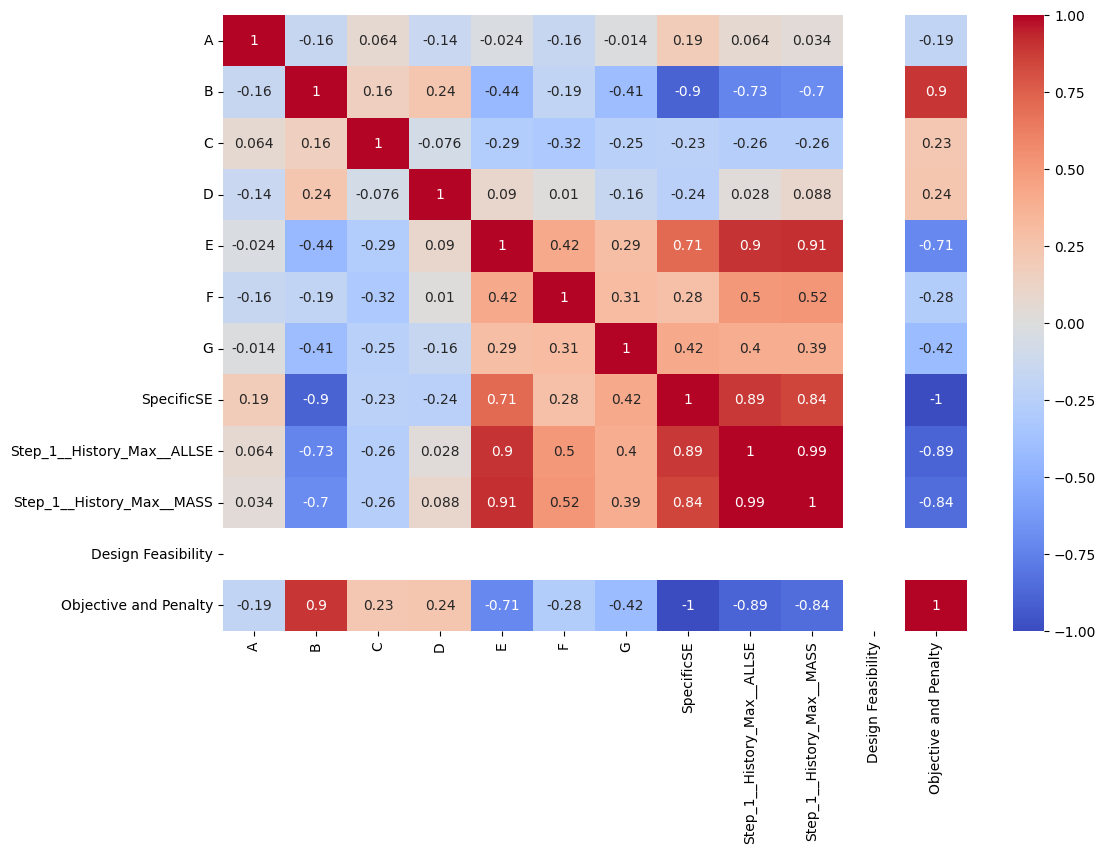

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplama
correlation_matrix = data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Özellikleri (bağımsız değişkenler) ve hedef değişkeni (bağımlı değişken) tanımlayın
important_features = data[['B','E','D','F','A']]  # Gerçek sütun adlarına göre ayarlayın
target = data['SpecificSE']  # SE için gerçek sütun adıyla değiştirin


In [ ]:
# prompt: Choose a regression model for optimization. For this task, Gradient Boosting Regressor is a suitable choice because it is durable.

from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modelini oluşturun
model = GradientBoostingRegressor(max_depth=2, random_state=42)

# Modeli eğitin
model.fit(important_features, target)


GradientBoostingRegressor(max_depth=2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(important_features, target, test_size=0.2, random_state=42)

# Modeli tanımlayın
model = GradientBoostingRegressor()

# Modeli eğitin
model.fit(X_train, y_train)


GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hiperparametreler için bir grid tanımlayın
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV'yi tanımlayın
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# GridSearchCV'yi eğitin
grid_search.fit(X_train, y_train)

# En iyi parametreleri alın
best_params = grid_search.best_params_
print(f'En iyi parametreler: {best_params}')


En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [ ]:
# En iyi parametrelerle modeli yeniden eğitin
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4, n_estimators=200)

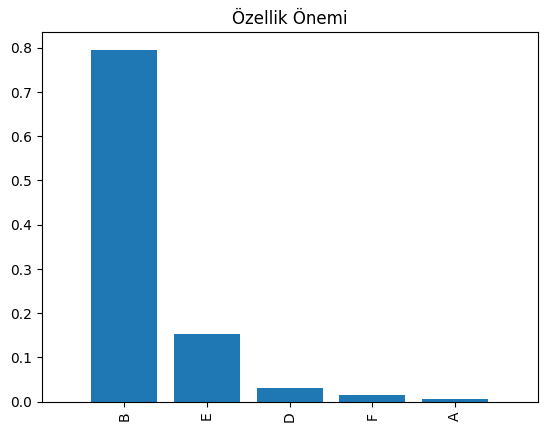

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Özellik önemini elde edin
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Özellikleri önem sırasına göre sıralayın ve çizin
plt.figure()
plt.title("Özellik Önemi")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# En önemli özellikleri seçin
#important_important_features = X_train.columns[indices][:5]  # İlk 5 özelliği seçin


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Tahminler yapın
y_pred = best_model.predict(X_test)

# Model performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ortalama Kare Hata (MSE): {mse}')
print(f'R-kare (R2) Skoru: {r2}')


Ortalama Kare Hata (MSE): 18023714502548.863
R-kare (R2) Skoru: 0.9885732328532275


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Farklı modelleri tanımlayın
models = {
    'GradientBoosting': GradientBoostingRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR()
}

# Hiperparametre gridlerini tanımlayın
param_grids = {
    'GradientBoosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]},
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]},
    'SVR': {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
}

# GridSearchCV ile modelleri optimize edin
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f'{model_name} en iyi parametreler: {grid_search.best_params_}')


GradientBoosting en iyi parametreler: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
RandomForest en iyi parametreler: {'max_depth': 5, 'n_estimators': 300}
SVR en iyi parametreler: {'C': 10, 'gamma': 1}


In [ ]:
from sklearn.ensemble import VotingRegressor

# En iyi modellerden bir ensamble oluşturun
ensemble_model = VotingRegressor(estimators=[
    ('gb', best_models['GradientBoosting']),
    ('rf', best_models['RandomForest']),
    ('svr', best_models['SVR'])
])

# Ensamble modeli eğitin
ensemble_model.fit(X_train, y_train)

# Ensamble model ile tahmin yapın ve değerlendirin
y_pred = ensemble_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ensemble Ortalama Kare Hata (MSE): {mse}')
print(f'Ensemble R-kare (R2) Skoru: {r2}')


Ensemble Ortalama Kare Hata (MSE): 209964029014304.22
Ensemble R-kare (R2) Skoru: 0.8668859258503375


In [ ]:
from sklearn.model_selection import cross_val_score

# Çapraz doğrulama ile model performansını değerlendirin
scores = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Çapraz Doğrulama MSE: {-scores.mean()}')


Çapraz Doğrulama MSE: 186385432711669.75
